<a href="https://colab.research.google.com/github/hatkiet/Project_4/blob/Mia-branch/HeartAttack_MachineLearning_2_MH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

<div>
<h3 style="font-size: 22px; font-weight: bold; color: #FF5733 ; margin-bottom: 10px;"> Understanding the Raw Dataset </h3>
    
</div>
**Columns**

1. State: Stores someone's geographic information.

2. Sex: Indicates someone's gender.

3. GeneralHealth: Describes someone's overall health condition.

4. PhysicalHealthDays: Describes someone's physical health condition.

5. MentalHealthDays: Indicates someone's mental health condition.

6. LastCheckupTime: Contains the information of the last health check

7. PhysicalActivities: Indicates how active someone is in physical activities.

8. SleepHours: Someone's sleep time, which could be an indicator of sleep health.

9. RemovedTeeth: Contains information about whether someone has removed teeth or not.

10. HadHeartAttack: This column stores information about whether someone has heart disease or not.

11. HadAngina: This column stores information about whether someone has angina (A type of chest pain caused by reduced blood flow to the heart) or not.

12. HadStroke: Contains information about whether someone has had a stroke or not.

13. HadAsthma: Stores information about whether someone has asthma or not.

14. HadSkinCancer: Stores information about whether someone has skin cancer or not.

15. HadCOPD: Stores information about whether someone has COPD (Symptoms include cough, sometimes with phlegm, difficulty breathing) or not

16. HadDepressiveDisorder: Stores information about whether someone has depressive disorder or not

17. HadKidneyDisease: Contains information about whether someone has kidney disease or not.

18. HadArthritis: Contains information about whether someone has arthritis (inflammation or swelling of one or more joints) or not

19. HadDiabetes: Stores information about whether someone has diabetes or not.

20. DeafOrHardOfHearing: Stores information about whether someone has difficulty hearing or not.

21. BlindOrVisionDifficulty: Stores information about whether someone has difficulty in vision or not.

22. DifficultyConcentrating: Stores information about whether someone has difficulty concentrating or not.

23. DifficultyWalking: Stores information about whether someone has difficulty walking or not.

24. DifficultyDressingBathing: Stores information about whether someone has difficulty dressing/bathing or not.

25. DifficultyErrands: Stores information about whether someone has difficulty errands or not.

26. SmokerStatus: Stores information about whether someone smokes or not.

27. ECigaretteUsage: Stores information about whether someone use electronic cigarette or not.

28. ChestScan: Stores information about whether someone had chest scanned or not.

29. RaceEthnicityCategory: Stores information about someone's race or ethnicity.

30. AgeCategory: Groups someone's age into specific categories.

31. HeightInMeters: Stores someone's height information (in meters).

32. WeightInKilograms: Stores someone's weight information (in kilograms).

33. BMI: Stands for Body Mass Index, which measures the proportion of weight to height for an individual.

34. AlcoholDrinkers: Information about whether someone consumes alcohol or not.

35. HIVTesting: Stores information about whether someone had HIV testing or not.

36. FluVaxLast12: Stores information about whether someone had flu vacination in the last 12 months or not.  

37. PneumoVaxEver: Stores information about whether someone ever had Pneumo Vaccination or not.  

38. TetanusLast10Tdap: Stores information about whether someone ever had Tdap Vaccination or not.

39. HighRiskLastYear: Stores information about whether someone was in high risk or not.

40. CovidPos: Stores information about whether someone had Covid or not.

# 1. Loading the Dataset from CSV

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("heart_2022_with_nans.csv")
# Display sample data
df.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             No  ...            NaN   
1         6.0          NaN             No  ...           1.60   
2         5.0          NaN             No  ...           1.57   
3         7.0          NaN             No  ...           1.65   
4         9.0          NaN             No  ...           1.57   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0               NaN    NaN              No         No          Yes   
1             68.04  26.57              No         No           No   
2             63.50  25.61              No         No           No   
3             63.50  23.30              No         No          Yes   
4             53.98  21.77             Yes         No           No   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0            No  Yes, received tetanus shot but not sure what type   
1            No  No, did not receive any tetanus shot in the pa...   
2            No                                                NaN   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No       No  
4               No       No  

[5 rows x 40 columns]

In [3]:
for col in df.columns:
  print(col)

State
Sex
GeneralHealth
PhysicalHealthDays
MentalHealthDays
LastCheckupTime
PhysicalActivities
SleepHours
RemovedTeeth
HadHeartAttack
HadAngina
HadStroke
HadAsthma
HadSkinCancer
HadCOPD
HadDepressiveDisorder
HadKidneyDisease
HadArthritis
HadDiabetes
DeafOrHardOfHearing
BlindOrVisionDifficulty
DifficultyConcentrating
DifficultyWalking
DifficultyDressingBathing
DifficultyErrands
SmokerStatus
ECigaretteUsage
ChestScan
RaceEthnicityCategory
AgeCategory
HeightInMeters
WeightInKilograms
BMI
AlcoholDrinkers
HIVTesting
FluVaxLast12
PneumoVaxEver
TetanusLast10Tdap
HighRiskLastYear
CovidPos


# 2. Exploring the Dataset

<Axes: >

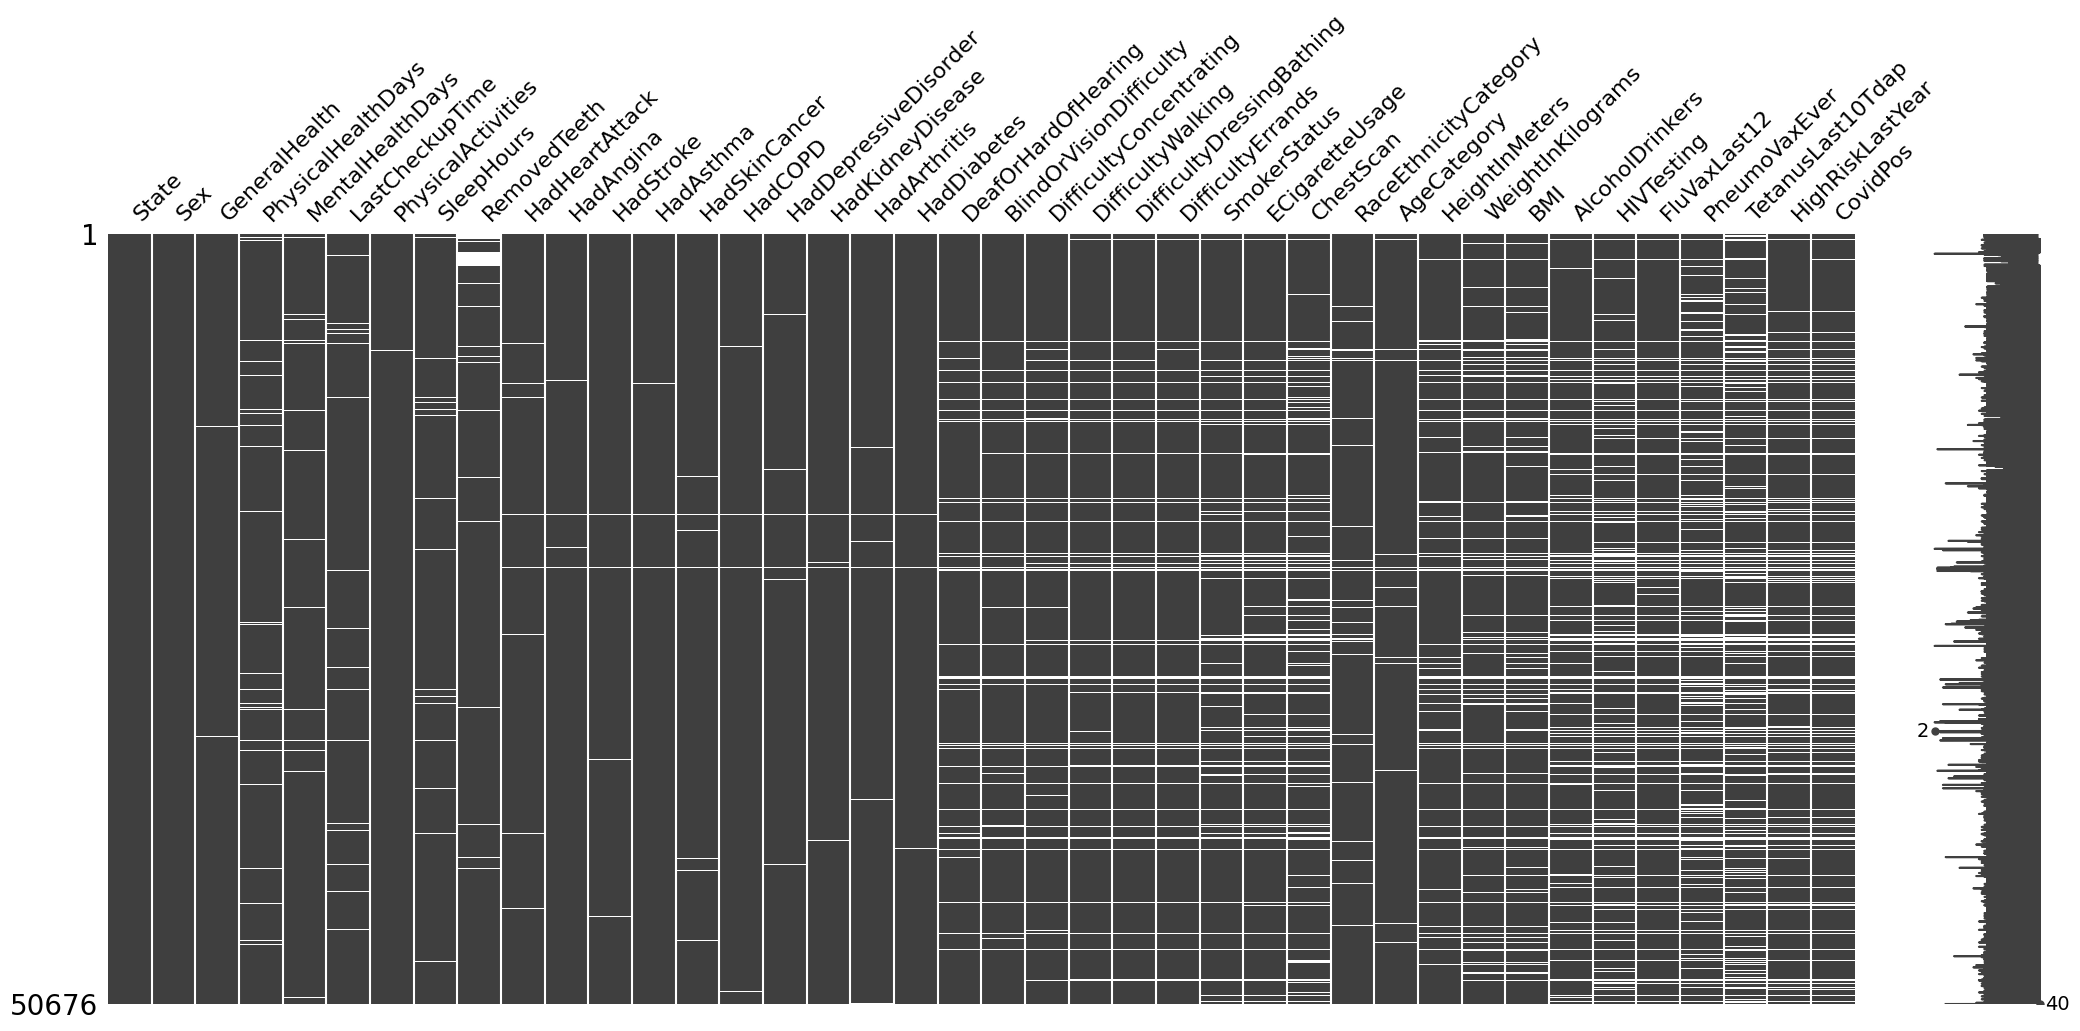

In [4]:
# Check he missing data
%matplotlib inline
msno.matrix(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50676 entries, 0 to 50675
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      50676 non-null  object 
 1   Sex                        50676 non-null  object 
 2   GeneralHealth              50523 non-null  object 
 3   PhysicalHealthDays         49122 non-null  float64
 4   MentalHealthDays           49374 non-null  float64
 5   LastCheckupTime            49564 non-null  object 
 6   PhysicalActivities         50533 non-null  object 
 7   SleepHours                 50045 non-null  float64
 8   RemovedTeeth               48257 non-null  object 
 9   HadHeartAttack             50229 non-null  object 
 10  HadAngina                  50133 non-null  object 
 11  HadStroke                  50432 non-null  object 
 12  HadAsthma                  50414 non-null  object 
 13  HadSkinCancer              50247 non-null  obj

In [6]:
# Statistical Analysis for numerical data in dataset
print(f"Summary of the Dataset with Numerical Columns")
df.describe()

Summary of the Dataset with Numerical Columns


PhysicalHealthDays  MentalHealthDays    SleepHours  HeightInMeters  \
count        49122.000000      49374.000000  50045.000000    47035.000000   
mean             4.554293          4.602726      7.036647        1.704982   
std              8.854848          8.513287      1.509083        0.107255   
min              0.000000          0.000000      1.000000        0.910000   
25%              0.000000          0.000000      6.000000        1.630000   
50%              0.000000          0.000000      7.000000        1.700000   
75%              4.000000          5.000000      8.000000        1.780000   
max             30.000000         30.000000     24.000000        2.360000   

       WeightInKilograms           BMI  
count       45927.000000  44956.000000  
mean           81.957258     28.081804  
std            20.969406      6.364982  
min            22.680000     12.210000  
25%            68.040000     23.740000  
50%            79.380000     27.120000  
75%            92.990000     31.180000  
max           292.570000     97.650000

In [7]:
# Find the duplicated values
df.duplicated().sum()

# Drop duplicated values
df.drop_duplicates(inplace=True)

# Check again information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50664 entries, 0 to 50675
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      50664 non-null  object 
 1   Sex                        50664 non-null  object 
 2   GeneralHealth              50512 non-null  object 
 3   PhysicalHealthDays         49111 non-null  float64
 4   MentalHealthDays           49363 non-null  float64
 5   LastCheckupTime            49555 non-null  object 
 6   PhysicalActivities         50522 non-null  object 
 7   SleepHours                 50034 non-null  float64
 8   RemovedTeeth               48246 non-null  object 
 9   HadHeartAttack             50218 non-null  object 
 10  HadAngina                  50122 non-null  object 
 11  HadStroke                  50421 non-null  object 
 12  HadAsthma                  50403 non-null  object 
 13  HadSkinCancer              50236 non-null  object 


In [8]:
# How many distinct values in each column
for column in df.columns:
    print(f"{column}: {len(df[column].unique())} distinct values")

State: 7 distinct values
Sex: 2 distinct values
GeneralHealth: 6 distinct values
PhysicalHealthDays: 32 distinct values
MentalHealthDays: 32 distinct values
LastCheckupTime: 6 distinct values
PhysicalActivities: 3 distinct values
SleepHours: 23 distinct values
RemovedTeeth: 5 distinct values
HadHeartAttack: 3 distinct values
HadAngina: 3 distinct values
HadStroke: 3 distinct values
HadAsthma: 3 distinct values
HadSkinCancer: 3 distinct values
HadCOPD: 3 distinct values
HadDepressiveDisorder: 3 distinct values
HadKidneyDisease: 3 distinct values
HadArthritis: 3 distinct values
HadDiabetes: 5 distinct values
DeafOrHardOfHearing: 3 distinct values
BlindOrVisionDifficulty: 3 distinct values
DifficultyConcentrating: 3 distinct values
DifficultyWalking: 3 distinct values
DifficultyDressingBathing: 3 distinct values
DifficultyErrands: 3 distinct values
SmokerStatus: 5 distinct values
ECigaretteUsage: 5 distinct values
ChestScan: 3 distinct values
RaceEthnicityCategory: 6 distinct values
AgeCa

In [9]:
# Finding NAN values
nan_values = df.isna().sum().sort_values(ascending=False)
nan_values_percentage = (nan_values/df.shape[0])*100

# Output the DataFrame with two columns nan_values and nan_values_percentage
pd.concat([nan_values, nan_values_percentage], axis=1).rename(columns= {0:"NaN Values", 1:"(%) of NaN Values"}).round(2)

NaN Values  (%) of NaN Values
TetanusLast10Tdap               10213              20.16
PneumoVaxEver                    9844              19.43
HIVTesting                       8237              16.26
ChestScan                        6880              13.58
CovidPos                         6525              12.88
HighRiskLastYear                 6478              12.79
FluVaxLast12                     5981              11.81
AlcoholDrinkers                  5830              11.51
BMI                              5709              11.27
WeightInKilograms                4738               9.35
ECigaretteUsage                  4572               9.02
SmokerStatus                     4522               8.93
HeightInMeters                   3630               7.16
DifficultyErrands                3317               6.55
DifficultyConcentrating          3090               6.10
DifficultyWalking                3090               6.10
DifficultyDressingBathing        3070               6.06
BlindOrVisionDifficulty          2723               5.37
DeafOrHardOfHearing              2616               5.16
RemovedTeeth                     2418               4.77
RaceEthnicityCategory            1994               3.94
PhysicalHealthDays               1553               3.07
MentalHealthDays                 1301               2.57
AgeCategory                      1122               2.21
LastCheckupTime                  1109               2.19
SleepHours                        630               1.24
HadAngina                         542               1.07
HadHeartAttack                    446               0.88
HadSkinCancer                     428               0.84
HadDepressiveDisorder             379               0.75
HadArthritis                      340               0.67
HadCOPD                           310               0.61
HadKidneyDisease                  261               0.52
HadAsthma                         261               0.52
HadStroke                         243               0.48
HadDiabetes                       194               0.38
GeneralHealth                     152               0.30
PhysicalActivities                142               0.28
Sex                                 0               0.00
State                               0               0.00

In [10]:
# Remove unneccessary columns using drop()
columns_to_drop = [
    'LastCheckupTime', 'RemovedTeeth', 'HadCOPD',
    'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating',
    'DifficultyDressingBathing', 'DifficultyErrands',
    'HeightInMeters', 'WeightInKilograms',
    'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
    'HighRiskLastYear', 'CovidPos'
]
df1 = df.drop(columns=columns_to_drop)
df1

State     Sex GeneralHealth  PhysicalHealthDays  \
0          Alabama  Female     Very good                 0.0   
1          Alabama  Female     Excellent                 0.0   
2          Alabama  Female     Very good                 2.0   
3          Alabama  Female     Excellent                 0.0   
4          Alabama  Female          Fair                 2.0   
...            ...     ...           ...                 ...   
50671  Connecticut  Female     Very good                 4.0   
50672  Connecticut    Male     Excellent                 4.0   
50673  Connecticut  Female     Very good                 0.0   
50674  Connecticut  Female     Excellent                 0.0   
50675  Connecticut  Female     Very good                 5.0   

       MentalHealthDays PhysicalActivities  SleepHours HadHeartAttack  \
0                   0.0                 No         8.0             No   
1                   0.0                 No         6.0             No   
2                   3.0                Yes         5.0             No   
3                   0.0                Yes         7.0             No   
4                   0.0                Yes         9.0             No   
...                 ...                ...         ...            ...   
50671              10.0                 No         7.0             No   
50672               0.0                 No         7.0             No   
50673              20.0                Yes         6.0             No   
50674              30.0                Yes         8.0             No   
50675              30.0                NaN         NaN            NaN   

      HadAngina HadStroke  ... HadKidneyDisease HadDiabetes DifficultyWalking  \
0            No        No  ...               No         Yes                No   
1            No        No  ...               No          No                No   
2            No        No  ...               No          No                No   
3            No        No  ...               No          No                No   
4            No        No  ...               No          No                No   
...         ...       ...  ...              ...         ...               ...   
50671        No        No  ...               No          No                No   
50672        No        No  ...               No          No                No   
50673        No        No  ...              Yes          No                No   
50674        No        No  ...               No          No                No   
50675       NaN       NaN  ...              NaN         NaN               NaN   

                                SmokerStatus  \
0                               Never smoked   
1                               Never smoked   
2                               Never smoked   
3      Current smoker - now smokes some days   
4                               Never smoked   
...                                      ...   
50671                           Never smoked   
50672                           Never smoked   
50673                           Never smoked   
50674                           Never smoked   
50675                                    NaN   

                                 ECigaretteUsage ChestScan  \
0                         Not at all (right now)        No   
1      Never used e-cigarettes in my entire life        No   
2      Never used e-cigarettes in my entire life        No   
3      Never used e-cigarettes in my entire life       Yes   
4      Never used e-cigarettes in my entire life       Yes   
...                                          ...       ...   
50671                     Not at all (right now)        No   
50672  Never used e-cigarettes in my entire life        No   
50673                     Not at all (right now)       Yes   
50674  Never used e-cigarettes in my entire life        No   
50675                                        NaN       NaN   

          RaceEthnicityCategory      AgeCategory    BMI AlcoholDrinkers 

In [11]:
# Check columns names after dropping
df1.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadDiabetes', 'DifficultyWalking', 'SmokerStatus', 'ECigaretteUsage',
       'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'BMI',
       'AlcoholDrinkers'],
      dtype='object')

In [12]:
# Reorganize columns order
column_order = [
        # User Info
        'State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory','BMI',
        # General health
        'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities', 'ChestScan',
        # risks
        'SleepHours', 'DifficultyWalking', 'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers',
        # Medication History
        'HadHeartAttack', 'HadAngina',  'HadStroke', 'HadAsthma',
        'HadSkinCancer', 'HadDepressiveDisorder', 'HadKidneyDisease','HadDiabetes',
        ]
df1 = df1[column_order]
df1

State     Sex      AgeCategory     RaceEthnicityCategory    BMI  \
0          Alabama  Female  Age 80 or older  White only, Non-Hispanic    NaN   
1          Alabama  Female  Age 80 or older  White only, Non-Hispanic  26.57   
2          Alabama  Female     Age 55 to 59  White only, Non-Hispanic  25.61   
3          Alabama  Female              NaN  White only, Non-Hispanic  23.30   
4          Alabama  Female     Age 40 to 44  White only, Non-Hispanic  21.77   
...            ...     ...              ...                       ...    ...   
50671  Connecticut  Female     Age 25 to 29                       NaN  22.63   
50672  Connecticut    Male     Age 45 to 49                  Hispanic  27.50   
50673  Connecticut  Female     Age 45 to 49  White only, Non-Hispanic  18.30   
50674  Connecticut  Female     Age 50 to 54  White only, Non-Hispanic  28.25   
50675  Connecticut  Female              NaN                       NaN    NaN   

      GeneralHealth  PhysicalHealthDays  MentalHealthDays PhysicalActivities  \
0         Very good                 0.0               0.0                 No   
1         Excellent                 0.0               0.0                 No   
2         Very good                 2.0               3.0                Yes   
3         Excellent                 0.0               0.0                Yes   
4              Fair                 2.0               0.0                Yes   
...             ...                 ...               ...                ...   
50671     Very good                 4.0              10.0                 No   
50672     Excellent                 4.0               0.0                 No   
50673     Very good                 0.0              20.0                Yes   
50674     Excellent                 0.0              30.0                Yes   
50675     Very good                 5.0              30.0                NaN   

      ChestScan  ...                            ECigaretteUsage  \
0            No  ...                     Not at all (right now)   
1            No  ...  Never used e-cigarettes in my entire life   
2            No  ...  Never used e-cigarettes in my entire life   
3           Yes  ...  Never used e-cigarettes in my entire life   
4           Yes  ...  Never used e-cigarettes in my entire life   
...         ...  ...                                        ...   
50671        No  ...                     Not at all (right now)   
50672        No  ...  Never used e-cigarettes in my entire life   
50673       Yes  ...                     Not at all (right now)   
50674        No  ...  Never used e-cigarettes in my entire life   
50675       NaN  ...                                        NaN   

      AlcoholDrinkers HadHeartAttack HadAngina HadStroke HadAsthma  \
0                  No             No        No        No        No   
1                  No             No        No        No        No   
2                  No             No        No        No        No   
3                  No             No        No        No       Yes   
4                 Yes             No        No        No        No   
...               ...            ...       ...       ...       ...   
50671              No             No        No        No        No   
50672              No             No        No        No       Yes   
50673              No             No        No        No        No   
50674             Yes             No        No        No        No   
50675             NaN            NaN       NaN       NaN       NaN   

      HadSkinCancer HadDepressiveDisorder HadKidneyDisease HadDiabetes  
0                No                    No               No         Yes  
1               Yes                    No               No          No  
2               Yes                    No               No          No  
3                No                    No               No          No  
4                No                    No               No          No  
...    

In [13]:
# Renaming columns using a dictionary
df1 = df1.rename(columns={
    'AgeCategory': "Age",
    'RaceEthnicityCategory': "Race",
    'GeneralHealth': "GenHealth",
    'PhysicalHealthDays': "PhysicalHealth",
    'PhysicalActivities': "PhysicalActivity",
    'MentalHealthDays': "MentalHealth",
    'HadAngina': "Angina",
    'HadHeartAttack': "HeartAttack",
    'HadStroke': "Stroke",
    'HadAsthma': "Asthma",
    'HadSkinCancer': "SkinCancer",
    'HadDepressiveDisorder': "Depressed",
    'HadKidneyDisease': "KidneyDisease",
    'DifficultyWalking': "DiffWalking",
    'HadDiabetes': "Diabetes",
    'SmokerStatus': "Smoking",
    'AlcoholDrinkers': "Drinking"
})
df1

State     Sex              Age                      Race    BMI  \
0          Alabama  Female  Age 80 or older  White only, Non-Hispanic    NaN   
1          Alabama  Female  Age 80 or older  White only, Non-Hispanic  26.57   
2          Alabama  Female     Age 55 to 59  White only, Non-Hispanic  25.61   
3          Alabama  Female              NaN  White only, Non-Hispanic  23.30   
4          Alabama  Female     Age 40 to 44  White only, Non-Hispanic  21.77   
...            ...     ...              ...                       ...    ...   
50671  Connecticut  Female     Age 25 to 29                       NaN  22.63   
50672  Connecticut    Male     Age 45 to 49                  Hispanic  27.50   
50673  Connecticut  Female     Age 45 to 49  White only, Non-Hispanic  18.30   
50674  Connecticut  Female     Age 50 to 54  White only, Non-Hispanic  28.25   
50675  Connecticut  Female              NaN                       NaN    NaN   

       GenHealth  PhysicalHealth  MentalHealth PhysicalActivity ChestScan  \
0      Very good             0.0           0.0               No        No   
1      Excellent             0.0           0.0               No        No   
2      Very good             2.0           3.0              Yes        No   
3      Excellent             0.0           0.0              Yes       Yes   
4           Fair             2.0           0.0              Yes       Yes   
...          ...             ...           ...              ...       ...   
50671  Very good             4.0          10.0               No        No   
50672  Excellent             4.0           0.0               No        No   
50673  Very good             0.0          20.0              Yes       Yes   
50674  Excellent             0.0          30.0              Yes        No   
50675  Very good             5.0          30.0              NaN       NaN   

       ...                            ECigaretteUsage Drinking HeartAttack  \
0      ...                     Not at all (right now)       No          No   
1      ...  Never used e-cigarettes in my entire life       No          No   
2      ...  Never used e-cigarettes in my entire life       No          No   
3      ...  Never used e-cigarettes in my entire life       No          No   
4      ...  Never used e-cigarettes in my entire life      Yes          No   
...    ...                                        ...      ...         ...   
50671  ...                     Not at all (right now)       No          No   
50672  ...  Never used e-cigarettes in my entire life       No          No   
50673  ...                     Not at all (right now)       No          No   
50674  ...  Never used e-cigarettes in my entire life      Yes          No   
50675  ...                                        NaN      NaN         NaN   

      Angina Stroke Asthma SkinCancer Depressed KidneyDisease Diabetes  
0         No     No     No         No        No            No      Yes  
1         No     No     No        Yes        No            No       No  
2         No     No     No        Yes        No            No       No  
3         No     No    Yes         No        No            No       No  
4         No     No     No         No        No            No       No  
...      ...    ...    ...        ...       ...           ...      ...  
50671     No     No     No         No        No            No       No  
50672     No     No    Yes         No        No            No       No  
50673     No     No     No         No       Yes           Yes       No  
50674     No     No     No         No        No            No       No  
50675    NaN    NaN    NaN        NaN       NaN           NaN      NaN  

[50664 rows x 23 columns]

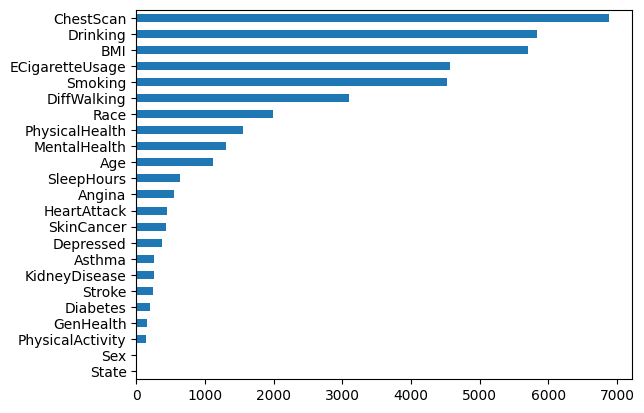

In [14]:
# Plot the distribution of NaN Values
df1.isna().sum().sort_values().plot(kind="barh")
plt.show()

In [15]:
# Remove the missing values
df1 = df1.dropna()

# Check again the missing values
df1.isna().sum()

State               0
Sex                 0
Age                 0
Race                0
BMI                 0
GenHealth           0
PhysicalHealth      0
MentalHealth        0
PhysicalActivity    0
ChestScan           0
SleepHours          0
DiffWalking         0
Smoking             0
ECigaretteUsage     0
Drinking            0
HeartAttack         0
Angina              0
Stroke              0
Asthma              0
SkinCancer          0
Depressed           0
KidneyDisease       0
Diabetes            0
dtype: int64

<Axes: >

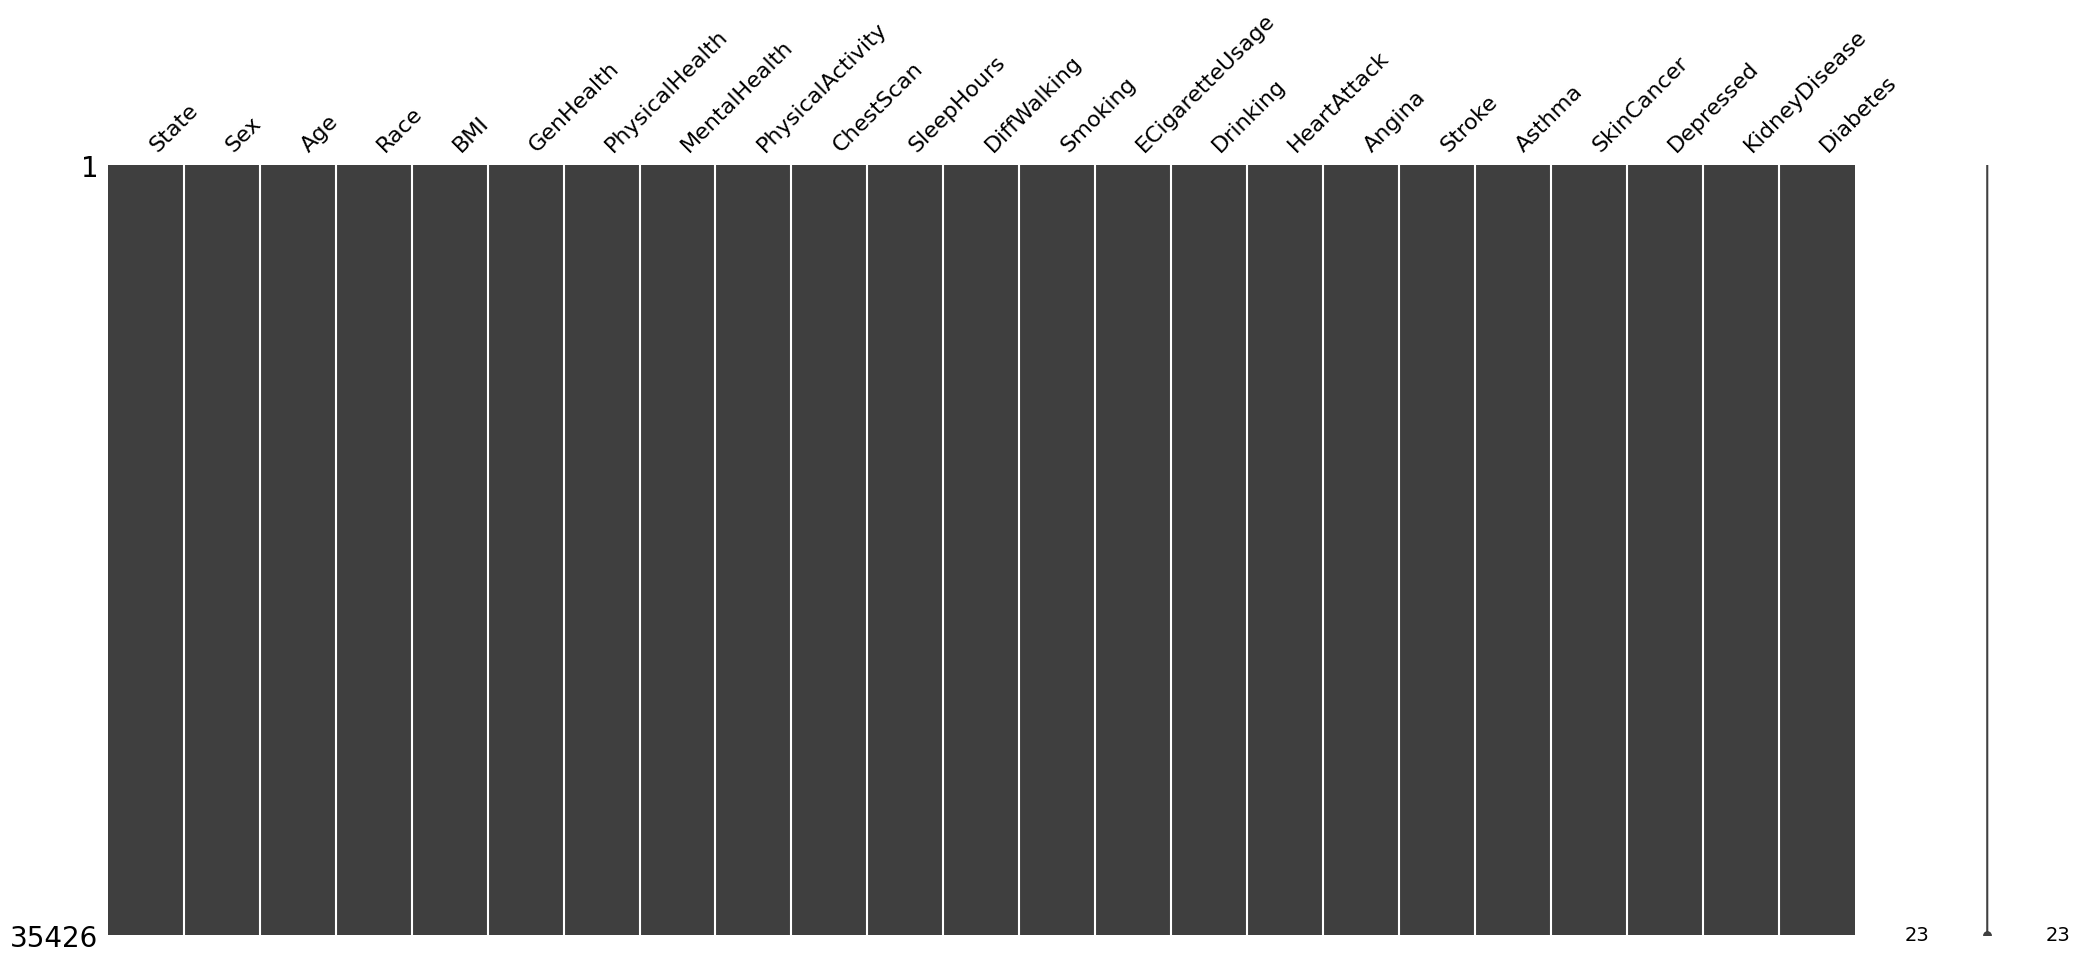

In [16]:
# Check he missing data
msno.matrix(df1)

In [17]:

# Statistical Analysis for numerical data in dataset
df1.describe()

BMI  PhysicalHealth  MentalHealth    SleepHours
count  35426.000000    35426.000000  35426.000000  35426.000000
mean      28.154347        4.377406      4.572461      7.039519
std        6.346401        8.643969      8.402333      1.447912
min       12.480000        0.000000      0.000000      1.000000
25%       23.780000        0.000000      0.000000      6.000000
50%       27.200000        0.000000      0.000000      7.000000
75%       31.250000        4.000000      5.000000      8.000000
max       97.650000       30.000000     30.000000     24.000000

In [18]:
df1.dtypes

State                object
Sex                  object
Age                  object
Race                 object
BMI                 float64
GenHealth            object
PhysicalHealth      float64
MentalHealth        float64
PhysicalActivity     object
ChestScan            object
SleepHours          float64
DiffWalking          object
Smoking              object
ECigaretteUsage      object
Drinking             object
HeartAttack          object
Angina               object
Stroke               object
Asthma               object
SkinCancer           object
Depressed            object
KidneyDisease        object
Diabetes             object
dtype: object

In [19]:
df1.describe(include="object")

State    Sex           Age                      Race  GenHealth  \
count        35426  35426         35426                     35426      35426   
unique           7      2            13                         5          5   
top     California   Male  Age 65 to 69  White only, Non-Hispanic  Very good   
freq          7102  17718          3713                     25032      12232   

       PhysicalActivity ChestScan DiffWalking       Smoking  \
count             35426     35426       35426         35426   
unique                2         2           2             4   
top                 Yes        No          No  Never smoked   
freq              27786     20715       30247         21349   

                                  ECigaretteUsage Drinking HeartAttack Angina  \
count                                       35426    35426       35426  35426   
unique                                          4        2           2      2   
top     Never used e-cigarettes in my entire life      Yes          No     No   
freq                                        26119    19794       33535  33417   

       Stroke Asthma SkinCancer Depressed KidneyDisease Diabetes  
count   35426  35426      35426     35426         35426    35426  
unique      2      2          2         2             2        4  
top        No     No         No        No            No       No  
freq    33991  29960      32315     27908         33916    29857

In [20]:
# Print out all description by columns
# Use FOR loop to iterate over columns

for col in df1.describe(include="object").columns:
    print(f"Column Name: {col} with {len(df1[col].unique())} distinct values")
    print(df1[col].unique())
    print("____________________________________")

Column Name: State with 7 distinct values
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut']
____________________________________
Column Name: Sex with 2 distinct values
['Female' 'Male']
____________________________________
Column Name: Age with 13 distinct values
['Age 80 or older' 'Age 55 to 59' 'Age 40 to 44' 'Age 65 to 69'
 'Age 70 to 74' 'Age 60 to 64' 'Age 75 to 79' 'Age 50 to 54'
 'Age 45 to 49' 'Age 35 to 39' 'Age 30 to 34' 'Age 25 to 29'
 'Age 18 to 24']
____________________________________
Column Name: Race with 5 distinct values
['White only, Non-Hispanic' 'Black only, Non-Hispanic'
 'Other race only, Non-Hispanic' 'Multiracial, Non-Hispanic' 'Hispanic']
____________________________________
Column Name: GenHealth with 5 distinct values
['Excellent' 'Very good' 'Fair' 'Poor' 'Good']
____________________________________
Column Name: PhysicalActivity with 2 distinct values
['No' 'Yes']
____________________________________
Column Name: ChestScan wi

In [21]:
# Find object/category columns
cat_cols= df1.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols

['State',
 'Sex',
 'Age',
 'Race',
 'GenHealth',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Smoking',
 'ECigaretteUsage',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease',
 'Diabetes']

## Since, some categorical attributes are overlapping --> Cleaning Needed

In [22]:
# Check the "Race" category
unique_race = df1["Race"].value_counts()
print(unique_race)

Race
White only, Non-Hispanic         25032
Hispanic                          4834
Black only, Non-Hispanic          2421
Other race only, Non-Hispanic     2255
Multiracial, Non-Hispanic          884
Name: count, dtype: int64


In [23]:
# Define re-names
rename_race = {
    "White only, Non-Hispanic": "White",
    "Black only, Non-Hispanic" : "Black",
    "Other race only, Non-Hispanic": "Other",
    "Multiracial, Non-Hispanic": "Multiracial"
}

# Replace values in the "Race" column
df1["Race"] = df1["Race"].replace(rename_race)
print(df1["Race"].value_counts())

Race
White          25032
Hispanic        4834
Black           2421
Other           2255
Multiracial      884
Name: count, dtype: int64


In [24]:
# Check the "Age" category
print(df1["Age"].value_counts())

Age
Age 65 to 69       3713
Age 60 to 64       3547
Age 70 to 74       3417
Age 55 to 59       2984
Age 50 to 54       2742
Age 75 to 79       2542
Age 40 to 44       2501
Age 80 or older    2480
Age 35 to 39       2467
Age 45 to 49       2374
Age 18 to 24       2342
Age 30 to 34       2338
Age 25 to 29       1979
Name: count, dtype: int64


In [25]:
df1["Age"] = (df1["Age"]
                     .str.replace(" to ", "-")
                     .str.replace("Age ", ""))

print(df1["Age"].value_counts())

Age
65-69          3713
60-64          3547
70-74          3417
55-59          2984
50-54          2742
75-79          2542
40-44          2501
80 or older    2480
35-39          2467
45-49          2374
18-24          2342
30-34          2338
25-29          1979
Name: count, dtype: int64


In [26]:
# Check unique values of Diabetes
print(df1["Diabetes"].value_counts())

Diabetes
No                                         29857
Yes                                         4508
No, pre-diabetes or borderline diabetes      792
Yes, but only during pregnancy (female)      269
Name: count, dtype: int64


In [27]:
rename_diabetes = {
    "No, pre-diabetes or borderline diabetes": "No, borderline diabetes",
    "Yes, but only during pregnancy (female)": "Yes, during pregnancy"
}
df1["Diabetes"] = df1["Diabetes"].replace(rename_diabetes)

# Check again
# Check unique values of Diabetes
print(df1["Diabetes"].value_counts())

Diabetes
No                         29857
Yes                         4508
No, borderline diabetes      792
Yes, during pregnancy        269
Name: count, dtype: int64


In [28]:
# Pair plot
# sns.pairplot(num_cols)
# plt.show()

# 3. Exploratory Data Analysis (EDA)

In [29]:
# Find numeric columns
num_cols= df1.select_dtypes(include=["number"]).columns.tolist()
num_cols

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepHours']

In [30]:
# Find object/category columns
cat_cols= df1.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols

['State',
 'Sex',
 'Age',
 'Race',
 'GenHealth',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Smoking',
 'ECigaretteUsage',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease',
 'Diabetes']

## 3.1. One-Variable Analysis

### 3.1.1. Numerical Features

Analysis for BMI columns:
Analysis for PhysicalHealth columns:
Analysis for MentalHealth columns:
Analysis for SleepHours columns:


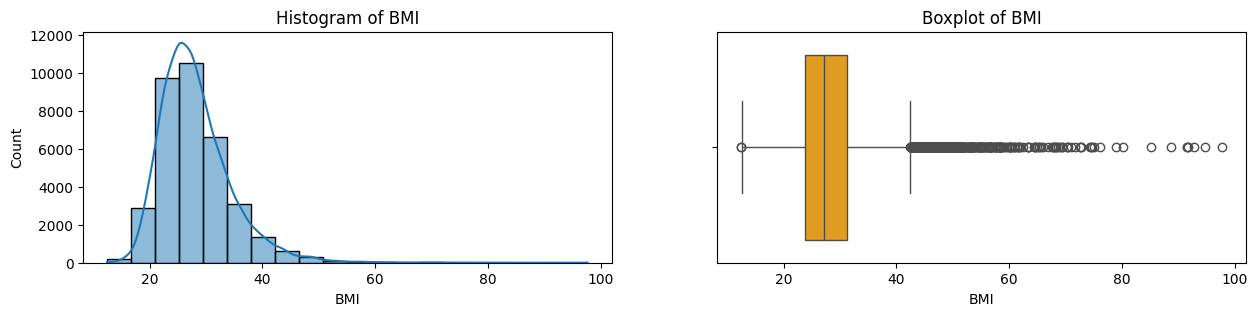

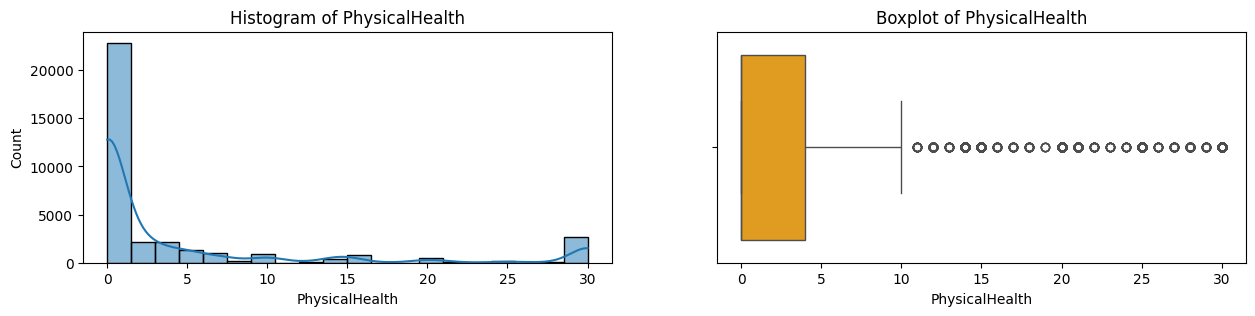

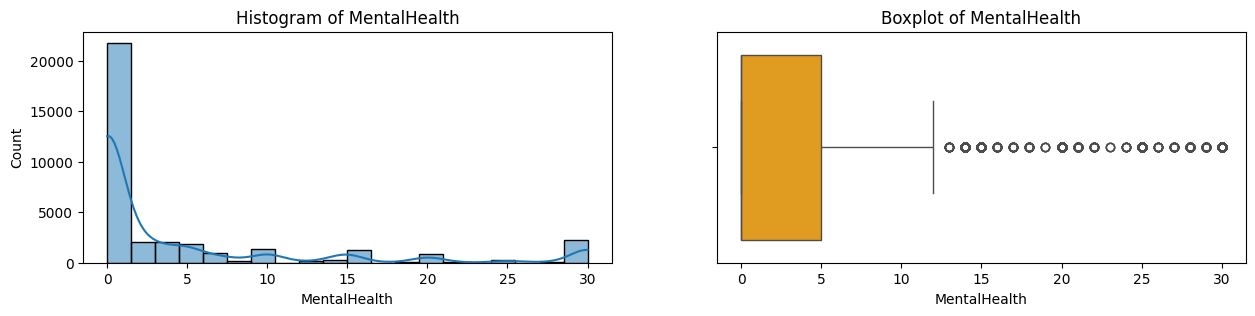

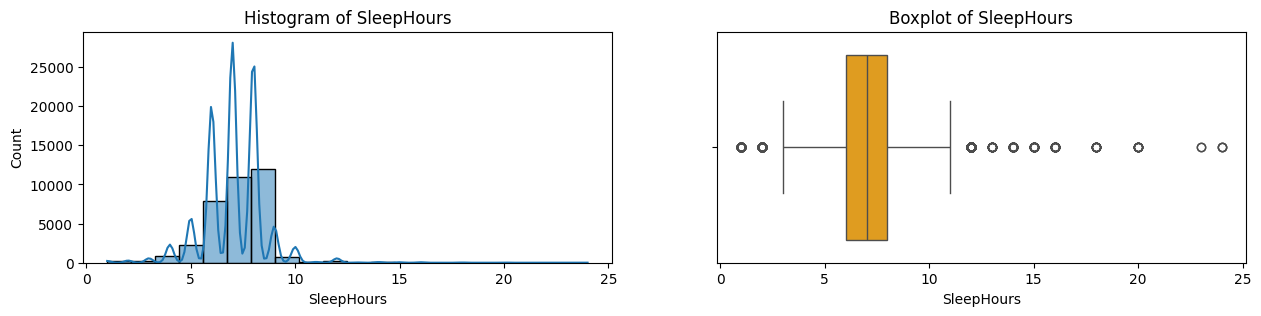

In [31]:
# Define Analysis function of numerical columns
def analysis_num(col):
    fig, ax = plt.subplots(1,2, figsize = (15,3))

    sns.histplot(df1[col], kde=True, bins=20, ax=ax[0])
    ax[0].set_title(f"Histogram of {col}")

    sns.boxplot(x=df1[col], color="orange", ax=ax[1])
    ax[1].set_title(f"Boxplot of {col}")

# FOR LOOPs for each column in numerical columns
for col in num_cols:
    print(f"Analysis for {col} columns:")
    analysis_num(col)

#### How many outliers?

In [32]:
# Define a function to count number of outlier data
def count_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    return ((data < lower_bound) | (data > upper_bound)).sum()

# Call count outlier function for each numerical fearture
for col in num_cols:
    print(f"Number of outliers in {col}: {count_outliers(df1[col])}")

Number of outliers in BMI: 1063
Number of outliers in PhysicalHealth: 4871
Number of outliers in MentalHealth: 5050
Number of outliers in SleepHours: 527


### 3.1.2. Categorical Features

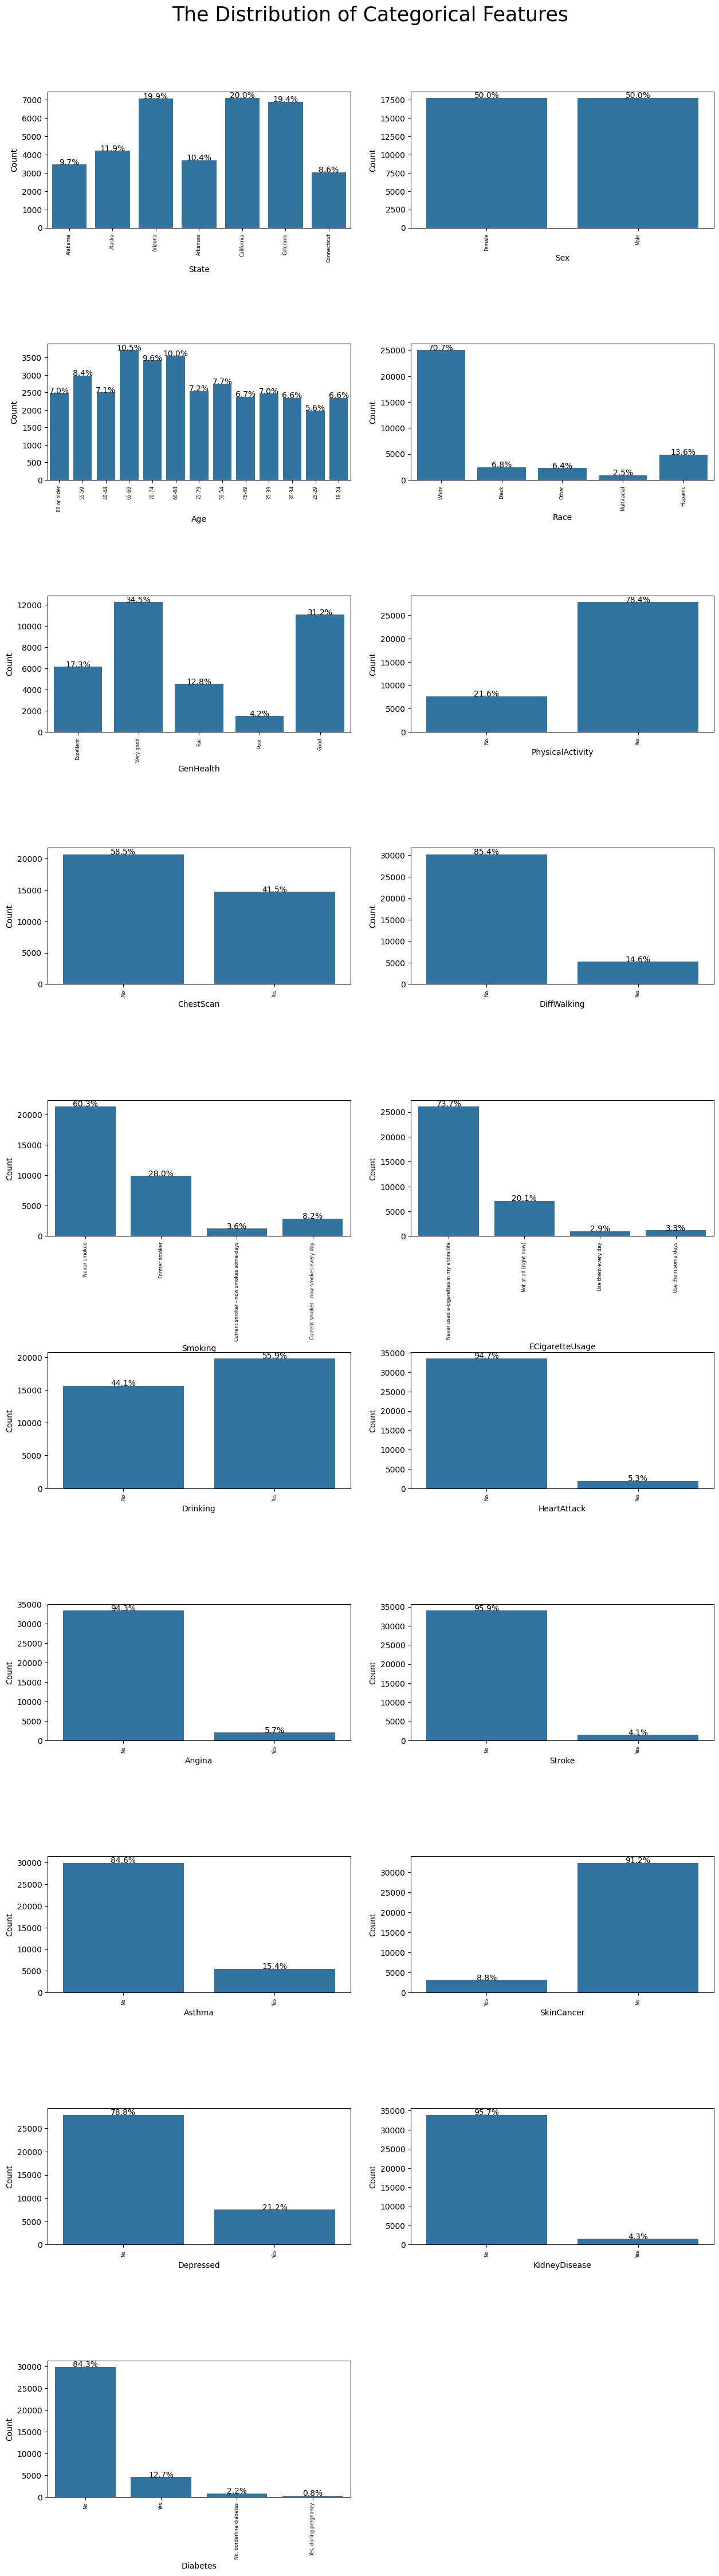

In [33]:
# Determin the number of rows and columns
L = len(cat_cols)
ncol = 2
nrow = int(np.ceil(L / ncol)) # Calculates the number of rows needed to fit all categorical columns

# Create Subplots
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5 * nrow))
# Adjust the spacing of the subplots
fig.subplots_adjust(top=0.95, hspace=0.85, wspace=0.2)

for i, col in enumerate(cat_cols):
    ax = axs[i // ncol, i % ncol] # determines the row & determines the column, respectively
    sns.countplot(data=df1, x=col, ax=ax)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=90, labelsize=6)

    # Add labels to bars
    total = float(len(df1))
    for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")
# Hide the last subplot if the number of columns is odd
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('The Distribution of Categorical Features', fontsize=25)
plt.show()

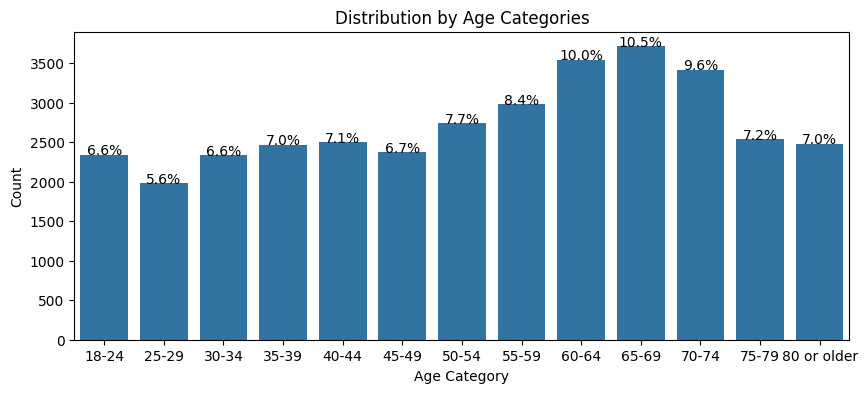

In [34]:
# Set figure styles
plt.figure(figsize=(10,4))

#Plot countplot
ax = sns.countplot(
    data=df1,
    x="Age",
    order = sorted(df1["Age"].unique())
    )

# Customize plot
ax.set(
    xlabel = "Age Category",
    ylabel = "Count",
    title = "Distribution by Age Categories"
)

# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Overall Distribution of Heart Attack

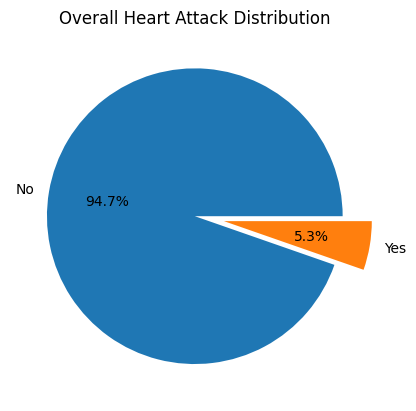

In [35]:
# Heart Attack distribution
heart_attack_rate = df1["HeartAttack"].value_counts()
plt.pie(
    heart_attack_rate.values,
    labels = heart_attack_rate.index,
    autopct = "%.1f%%",
    explode = [0, 0.2]
    )
plt.title("Overall Heart Attack Distribution")
plt.show()

## 3.2. Two-Variables Analysis

### 3.2.1 Analysis by Numerical Features

Analysis for BMI columns:
Analysis for PhysicalHealth columns:
Analysis for MentalHealth columns:
Analysis for SleepHours columns:


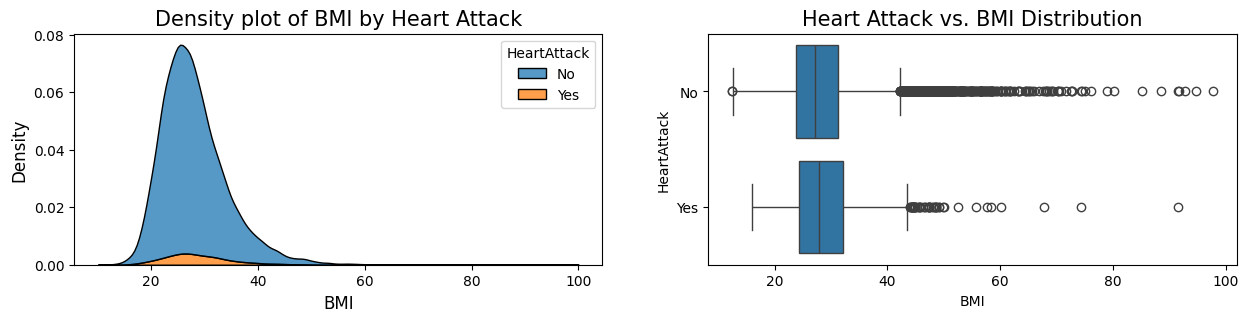

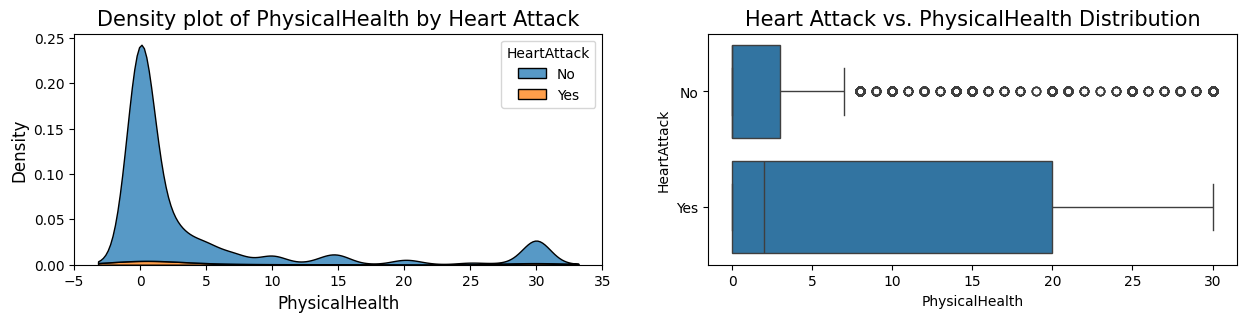

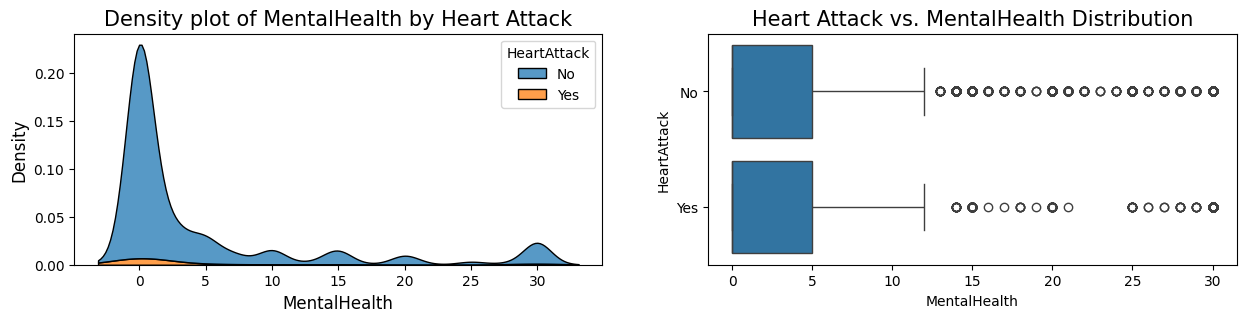

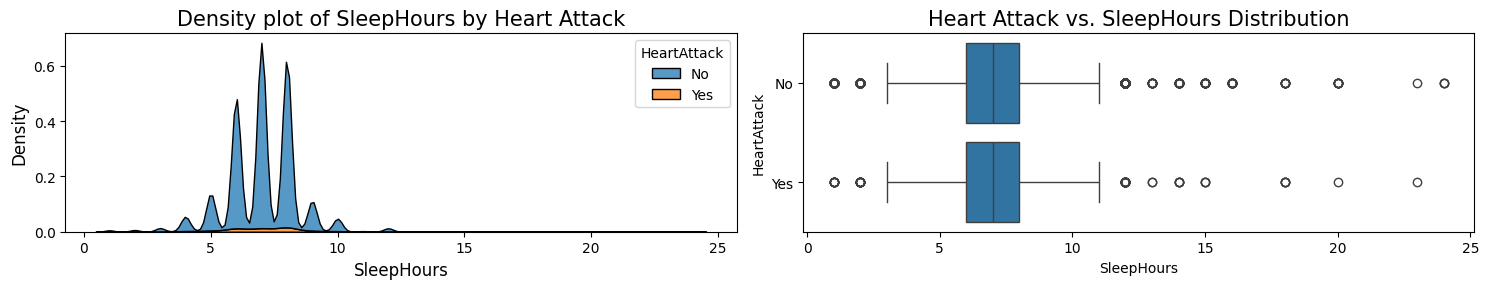

In [36]:
# Define Analysis function of numerical columns
def analysis_num_2(col):
    fig, ax = plt.subplots(1,2, figsize = (15,3))

    # KDE Plot
    sns.kdeplot(data=df1, x=col, hue="HeartAttack", multiple="stack", ax=ax[0])
    ax[0].set_xlabel(col, fontsize=12)
    ax[0].set_ylabel("Density", fontsize=12)
    ax[0].set_title(f"Density plot of {col} by Heart Attack", fontsize=15)

    # Boxplot
    sns.boxplot(data=df1, x=col, y="HeartAttack", ax=ax[1])
    ax[1].set_title(f"Heart Attack vs. {col} Distribution", fontsize=15)

# FOR LOOPs for each column in numerical columns
for col in num_cols:
    print(f"Analysis for {col} columns:")
    analysis_num_2(col)

plt.tight_layout()
plt.show()

### 3.2.2 Analysis by Categorical Features

### Heart Attack Among Genders

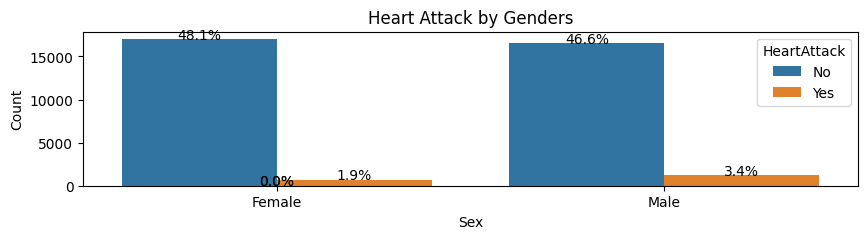

In [37]:
# Set figure styles
plt.figure(figsize=(10,2))

#Plot countplot
ax = sns.countplot(data=df1, x="Sex", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by Genders"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Heart Attack by States

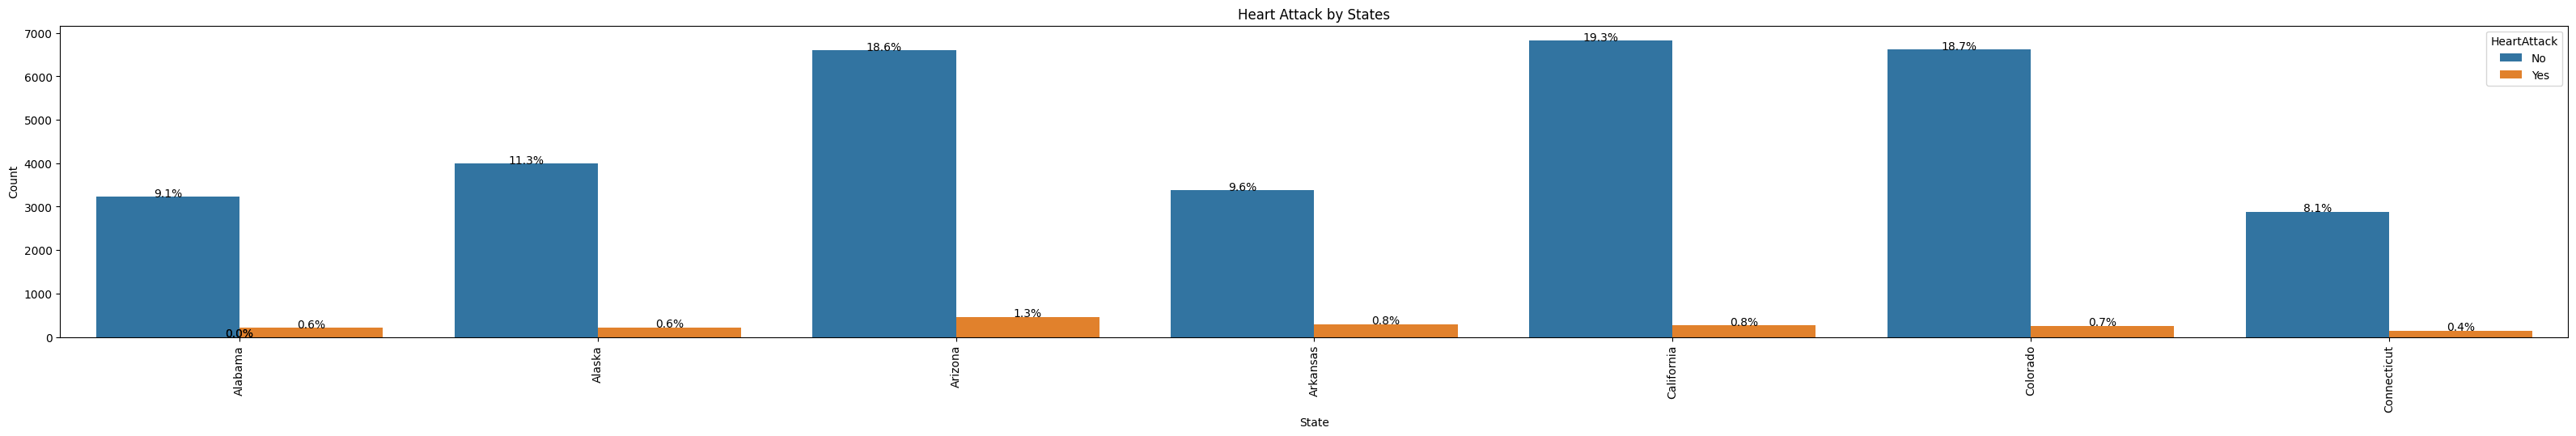

In [38]:
# Set figure styles
plt.figure(figsize=(40,5))

#Plot countplot
ax = sns.countplot(data=df1, x="State", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by States"
)
ax.tick_params(axis='x', rotation=90, labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

#### Heart Attack by Age Groups

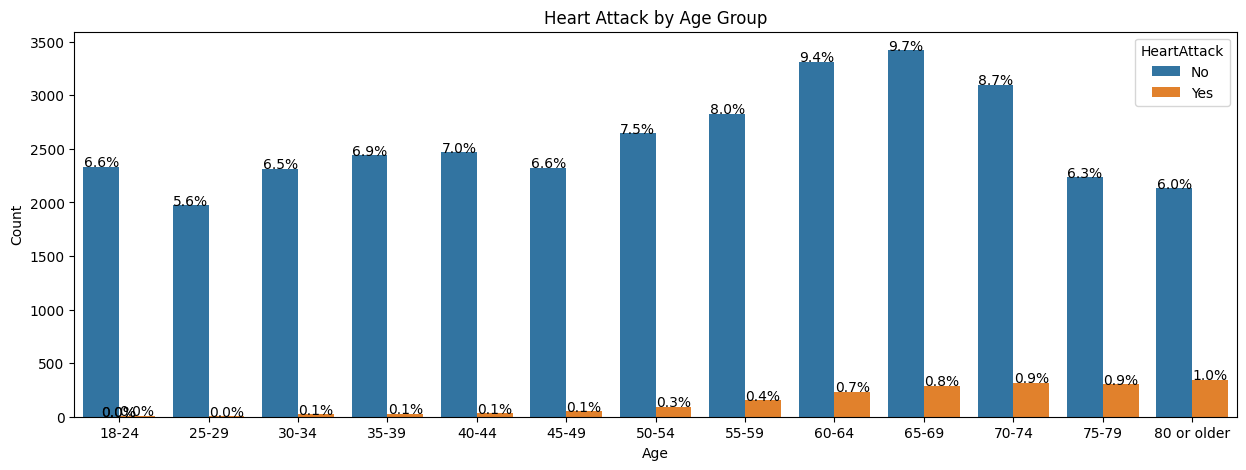

In [39]:
# Set figure styles
plt.figure(figsize=(15,5))

#Plot countplot
ax = sns.countplot(data=df1, x="Age", hue="HeartAttack", order = sorted(df1["Age"].unique()))

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by Age Group"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Heart Attack by Race

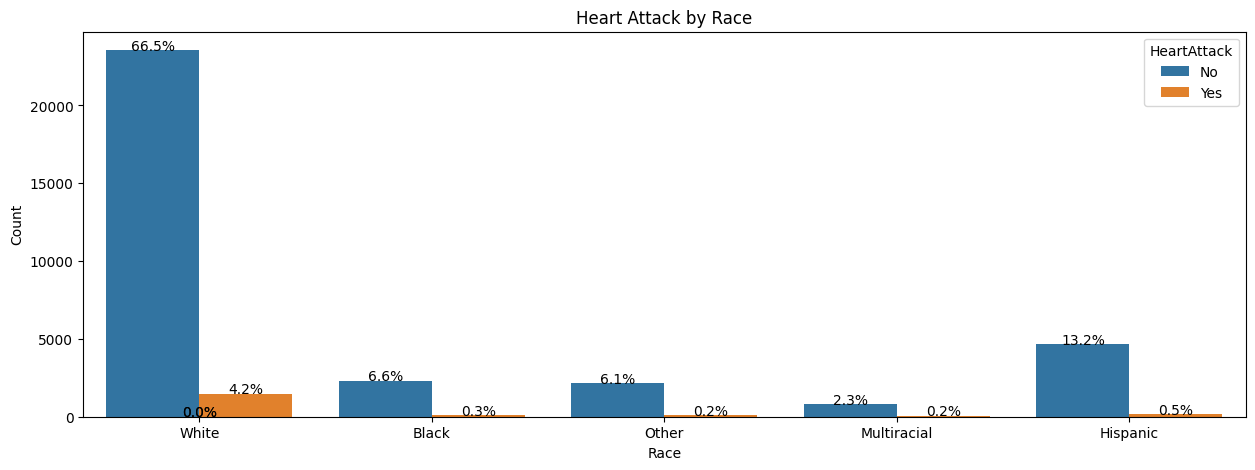

In [40]:
# Set figure styles
plt.figure(figsize=(15,5))

#Plot countplot
ax = sns.countplot(data=df1, x="Race", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by Race"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Heart Attack by Other Categorical Features

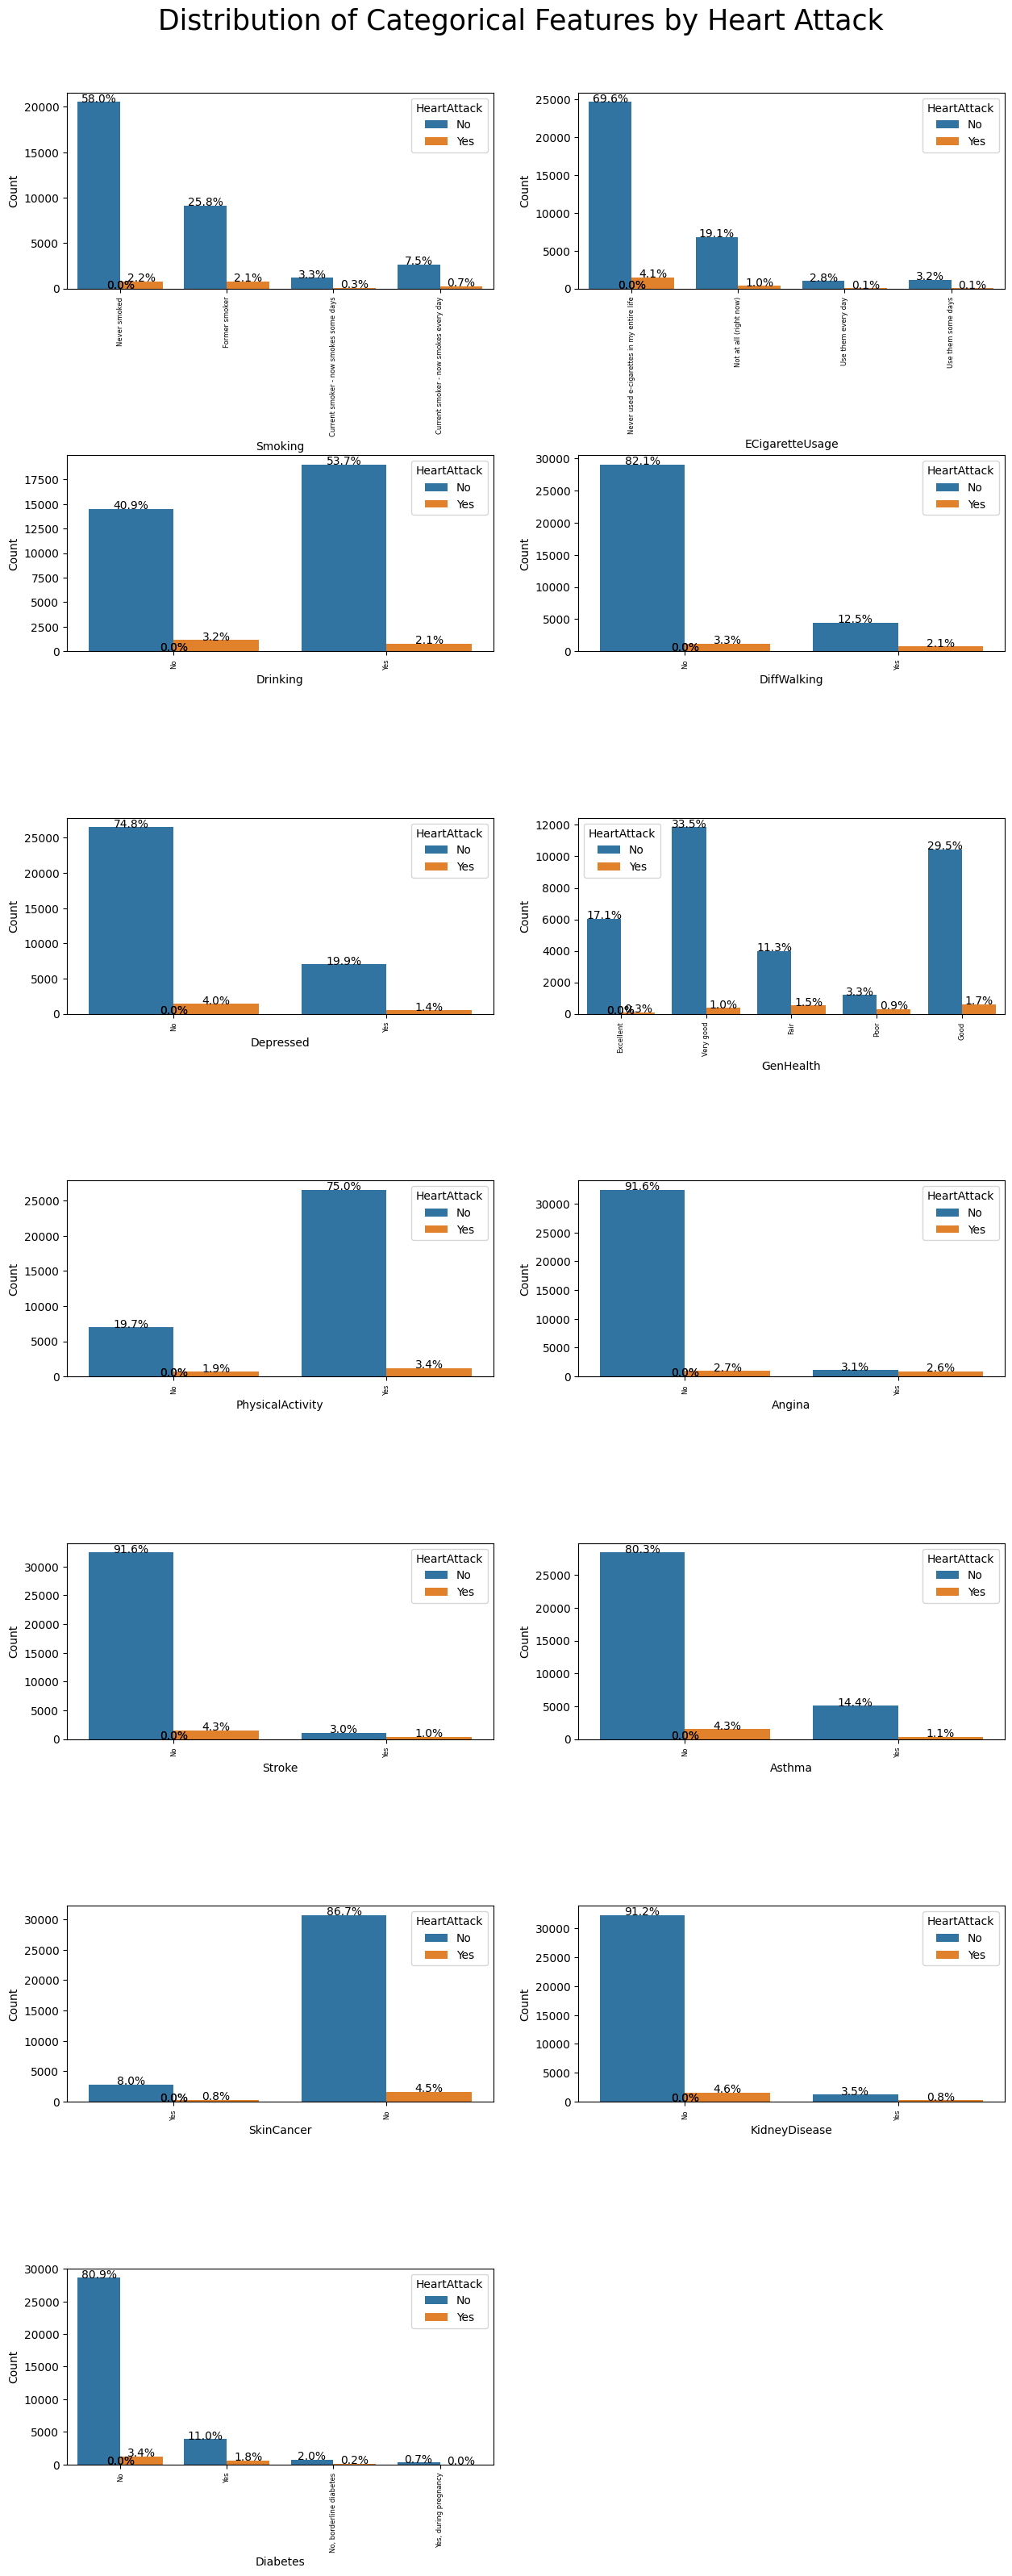

In [41]:
risk_cols = ['Smoking', 'ECigaretteUsage', 'Drinking', 'DiffWalking', 'Depressed',
             'GenHealth', 'PhysicalActivity', 'Angina', 'Stroke', 'Asthma',
             'SkinCancer', 'KidneyDisease', 'Diabetes']
# Determin the number of rows and columns
L = len(risk_cols)
ncol = 2
nrow = int(np.ceil(L / ncol)) # Calculates the number of rows needed to fit all categorical columns

# Create Subplots
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5 * nrow))
# Adjust the spacing of the subplots
fig.subplots_adjust(top=0.95, hspace=0.85, wspace=0.2)

for i, col in enumerate(risk_cols):
    ax = axs[i // ncol, i % ncol] # determines the row & determines the column, respectively
    sns.countplot(data=df1, x=col, hue="HeartAttack", ax=ax)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=90, labelsize=6)

    # Add labels to bars
    total = float(len(df1))
    for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Hide the last subplot if the number of columns is odd
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features by Heart Attack', fontsize=25)
plt.show()

# 4. Data Processing

### 4.1. Convert Categorical Variables to Numerical Variables

In [42]:
# Identify binary columns
# The condition checks if the column has exactly 2 unique values using the nunique()
binary_cols = [col for col in df1.columns if df1[col].nunique() == 2]
binary_cols

['Sex',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease']

In [43]:
# Copy df1 to df2
df2 = df1.copy()

# Then, drop column named "State"
df2 = df2.drop("State", axis=1)

In [44]:
# Convert and verify binary columns
all_binary = True

for col in binary_cols:
    unique_values = df2[col].unique()
    if set(unique_values) != {0, 1}:
        mapping = {unique_values[0]: 0, unique_values[1]: 1}
        df2[col] = df2[col].map(mapping)

    # Verify conversion
    if set(df2[col].unique()) != {0, 1}:
        all_binary = False
        print(f"Column {col} has non-binary values: {set(df2[col].unique())}")

if all_binary:
    print("All binary columns have been successfully converted to 0 and 1.")
else:
    print("Some columns still have non-binary values.")

All binary columns have been successfully converted to 0 and 1.


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35426 entries, 1 to 50674
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               35426 non-null  int64  
 1   Age               35426 non-null  object 
 2   Race              35426 non-null  object 
 3   BMI               35426 non-null  float64
 4   GenHealth         35426 non-null  object 
 5   PhysicalHealth    35426 non-null  float64
 6   MentalHealth      35426 non-null  float64
 7   PhysicalActivity  35426 non-null  int64  
 8   ChestScan         35426 non-null  int64  
 9   SleepHours        35426 non-null  float64
 10  DiffWalking       35426 non-null  int64  
 11  Smoking           35426 non-null  object 
 12  ECigaretteUsage   35426 non-null  object 
 13  Drinking          35426 non-null  int64  
 14  HeartAttack       35426 non-null  int64  
 15  Angina            35426 non-null  int64  
 16  Stroke            35426 non-null  int64  
 17

In [46]:
# Encoding "object" type variables

# Age
age_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80 or older': 12
}
df2["Age"] = df2["Age"].replace(age_mapping).astype(int)

# Race
race_mapping = {
    'White': 0,
    'Black': 1,
    'Other': 2,
    'Multiracial': 3,
    'Hispanic': 4
}
df2["Race"] = df2["Race"].replace(race_mapping).astype(int)

# GenHealth
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df2["GenHealth"] = df2["GenHealth"].replace(genhealth_mapping).astype(int)

# Smoking
smoking_mapping = {
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes some days': 2,
    'Current smoker - now smokes every day': 3
}
df2["Smoking"] = df2["Smoking"].replace(smoking_mapping).astype(int)

# ECigaretteUsage
ec_mapping = {
    'Never used e-cigarettes in my entire life': 0,
    'Not at all (right now)': 1,
    'Use them every day': 2,
    'Use them some days': 3
}
df2["ECigaretteUsage"] = df2["ECigaretteUsage"].replace(ec_mapping).astype(int)

# Diabetic
diabetic_mapping = {
    'No': 0,
    'Yes': 1,
    'No, borderline diabetes': 3,
    'Yes, during pregnancy': 4
}
df2["Diabetes"] = df2["Diabetes"].replace(diabetic_mapping).astype(int)

In [47]:
# Check columns' type again
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35426 entries, 1 to 50674
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               35426 non-null  int64  
 1   Age               35426 non-null  int64  
 2   Race              35426 non-null  int64  
 3   BMI               35426 non-null  float64
 4   GenHealth         35426 non-null  int64  
 5   PhysicalHealth    35426 non-null  float64
 6   MentalHealth      35426 non-null  float64
 7   PhysicalActivity  35426 non-null  int64  
 8   ChestScan         35426 non-null  int64  
 9   SleepHours        35426 non-null  float64
 10  DiffWalking       35426 non-null  int64  
 11  Smoking           35426 non-null  int64  
 12  ECigaretteUsage   35426 non-null  int64  
 13  Drinking          35426 non-null  int64  
 14  HeartAttack       35426 non-null  int64  
 15  Angina            35426 non-null  int64  
 16  Stroke            35426 non-null  int64  
 17

### 4.2. Correlation Matrix

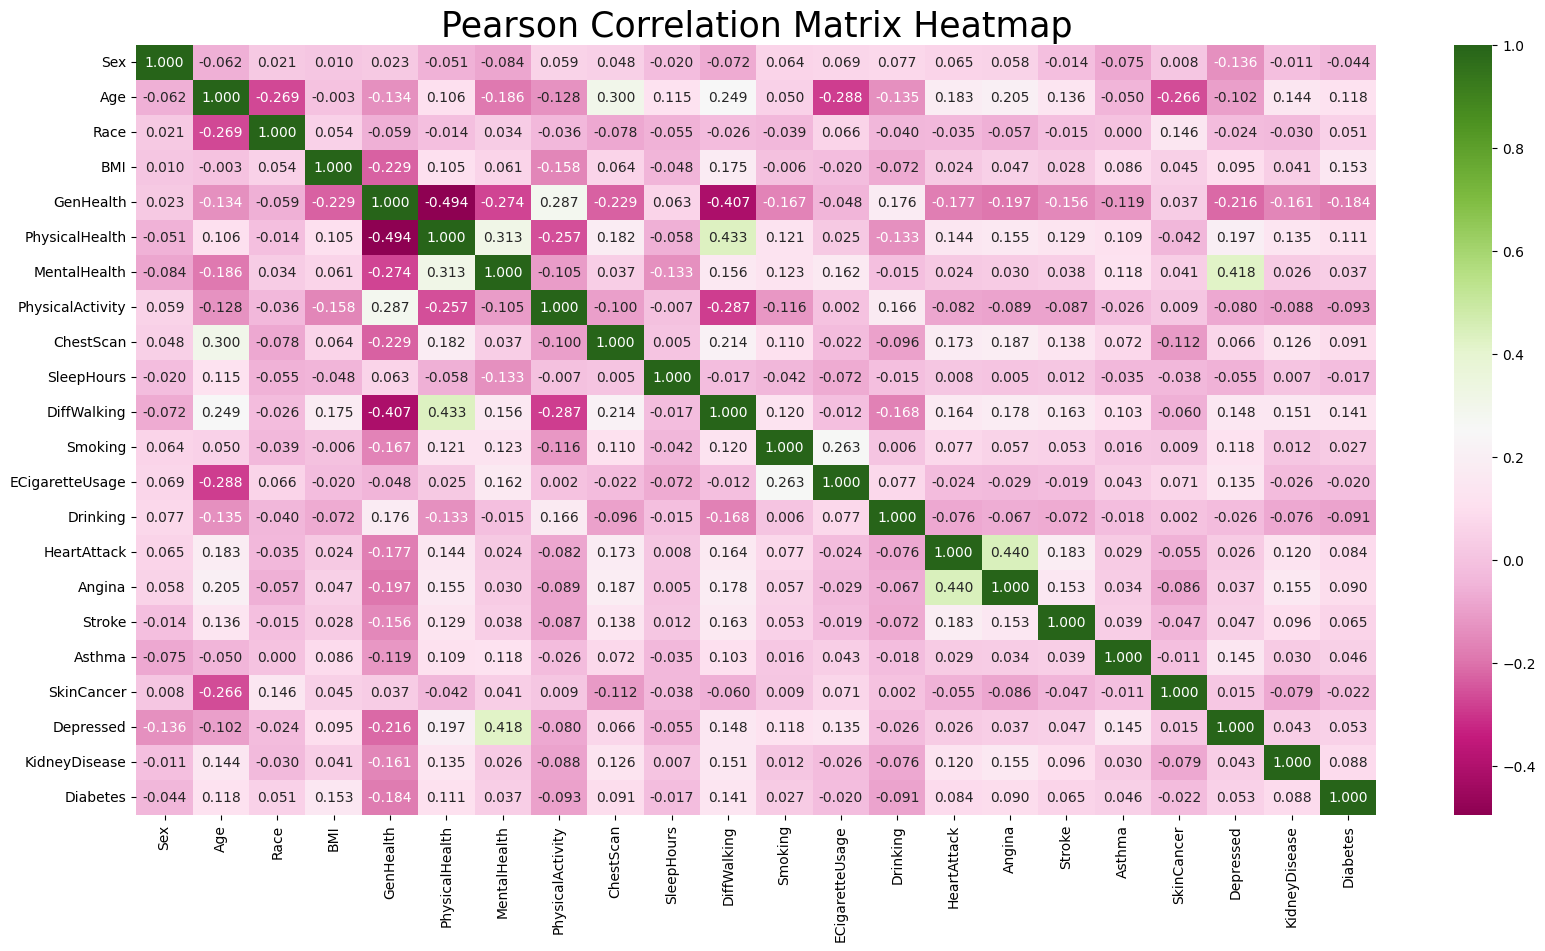

In [48]:
# Plot the Heatmap of correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), cmap= 'PiYG', fmt='.3f', annot=True)
plt.yticks(rotation=0)
plt.title("Pearson Correlation Matrix Heatmap", fontsize=25)
plt.show()

# 5. Machine Learning

### 5.1. Linear Regression Model
##### 5.1.1 Building Model

In [49]:
# Copy dataset for Machine Learning
df3 = df2.copy()

In [50]:
# Split the data into feature (X) and target variable (y)
X = df3.drop("HeartAttack", axis=1)
y = df3["HeartAttack"]

In [51]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

##### 5.1.2. Create a Logistic Regression Model with the Original Data

In [52]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [53]:
# Make a prediction using the testing data

# Make a prediction using the X_test
y_prediction = model.predict(X_test)

# Create a DataFrame for the predicted y values
df_y_prediction = pd.DataFrame({"y_test": y_test, "prediction": y_prediction})
df_y_prediction.sample(10)

y_test  prediction
48587       0           0
9783        0           0
49184       0           0
45968       0           0
43359       0           0
46122       0           0
28274       0           0
49581       0           0
18320       0           0
47661       0           0

##### 5.1.3. Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [54]:
# Generate a confusion matrix for the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_prediction))

Confusion Matrix:
[[8280  104]
 [ 353  120]]


In [55]:
# Print the classification report for the model

# Set the target variable labels
target_label_names = ["No (0)", "Yes (1)"]

# Print the classification report for the model
print("The classification report for the model:")
print(classification_report(y_test, y_prediction, target_names=target_label_names))

The classification report for the model:
              precision    recall  f1-score   support

      No (0)       0.96      0.99      0.97      8384
     Yes (1)       0.54      0.25      0.34       473

    accuracy                           0.95      8857
   macro avg       0.75      0.62      0.66      8857
weighted avg       0.94      0.95      0.94      8857



**Question:** How well does the logistic regression model predict both the `0` (No Heart Attack) and `1` (Had Heart Attack) labels?

**Answer:** When compared to the original dataset, there are more 'No' than 'Yes'. Even though, the model demonstrates a high accuracy of 95%. The precision score for 'No' is 96%, while the precision for 'Yes' is extremely low with 56%. Additionally, the recall score is 99% for predicting 'No' labels, but 26% for high-risk 'Yes'.

### 5.2. Deep Learning - Standard Scaler Module

In [56]:
# Copy dataset for Machine Learning
df4 = df2.copy()

In [102]:
df4.head()

Sex  Age  Race    BMI  GenHealth  PhysicalHealth  MentalHealth  \
1    0   12     0  26.57          4             0.0           0.0   
2    0    7     0  25.61          3             2.0           3.0   
4    0    4     0  Other          1             2.0           0.0   
5    1   12     0  Other          0             1.0           0.0   
6    0   12     1  22.96          3             0.0           0.0   

   PhysicalActivity  ChestScan  SleepHours  ...  ECigaretteUsage  Drinking  \
1                 0          0         6.0  ...                0         0   
2                 1          0         5.0  ...                0         0   
4                 1          1         9.0  ...                0         1   
5                 0          0         7.0  ...                0         0   
6                 1          0         7.0  ...                0         1   

   HeartAttack  Angina  Stroke  Asthma  SkinCancer  Depressed  KidneyDisease  \
1            0       0       0       0           0          0              0   
2            0       0       0       0           0          0              0   
4            0       0       0       0           1          0              0   
5            1       0       1       0           1          0              0   
6            0       0       0       0           1          0              0   

   Diabetes  
1         0  
2         0  
4         0  
5         1  
6         0  

[5 rows x 22 columns]

In [57]:
# Determine the number of unique values in each column by using 'nunique()'.
print(df4.nunique())

Sex                    2
Age                   13
Race                   5
BMI                 2249
GenHealth              5
PhysicalHealth        31
MentalHealth          31
PhysicalActivity       2
ChestScan              2
SleepHours            20
DiffWalking            2
Smoking                4
ECigaretteUsage        4
Drinking               2
HeartAttack            2
Angina                 2
Stroke                 2
Asthma                 2
SkinCancer             2
Depressed              2
KidneyDisease          2
Diabetes               4
dtype: int64


In [58]:
# Look at BMI value counts to identify and replace with "Other"
bmi_counts = df4["BMI"].value_counts()
bmi_counts

BMI
26.63    371
27.46    298
27.12    285
27.44    272
24.41    269
        ... 
15.96      1
31.77      1
53.66      1
25.01      1
13.99      1
Name: count, Length: 2249, dtype: int64

In [59]:
# Choose a cutoff value (i.e., 500) and create a list of bmi to be replaced
# use the variable name `bmi_to_replace`
bmi_to_replace = list(bmi_counts[bmi_counts < 50].index)
#bmi_to_replace
# Replace in dataframe
for bmi in bmi_to_replace:
    df4['BMI'] = df4['BMI'].replace(bmi,"Other")

# Check to make sure replacement was successful
df4['BMI'].value_counts()

BMI
Other    14911
26.63      371
27.46      298
27.12      285
27.44      272
         ...  
31.66       52
22.05       52
28.37       52
33.89       51
35.15       50
Name: count, Length: 198, dtype: int64

In [60]:
# # Convert categorical data to numeric with `pd.get_dummies`
# num_df4 = pd.get_dummies(df4)
# num_df4.head()

In [61]:
# X = num_df4.drop("HeartAttack", axis=1)
# y = num_df4["HeartAttack"]

In [62]:
# # # Split our preprocessed data into our features and target arrays
# # y = num_df4["HeartAttack"].values
# # X = num_df4.drop(columns="HeartAttack").values

# # Split the preprocessed data into a training and testing dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [63]:
# # Preprocess numerical data for neural network

# # Create a StandardScaler instances
# scaler = StandardScaler()

# # Fit the StandardScaler
# X_scaler = scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

#### Compile, Train and Evaluate the Model

In [70]:
import tensorflow as tf

# # Define the model - deep learning neural network, i.e., the number of input features and hidden nodes for each layer.
# number_input_features = X_train.shape[1]

# nn_model = tf.keras.models.Sequential()

# # First hidden layer
# nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=number_input_features))

# # Second hidden layer
# nn_model.add(tf.keras.layers.Dense(units=80, activation="relu"))

# # Third hidden layer
# nn_model.add(tf.keras.layers.Dense(units=80, activation="tanh"))


# # Output layer
# nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# # Check the structure of the model
# nn_model.summary()

In [65]:
# # Compile the model
# nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [66]:
# # Train the model
# fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

In [67]:
# # Evaluate the model using the test data
# model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6.1

In [68]:
df4.shape

(35426, 22)

6.2: Scale the Dataframe

6.3: Initialize the K-means model

KMeans(n_clusters=2)

In [133]:
X = df4.drop("HeartAttack", axis=1)
y = df4["HeartAttack"]

# Identify columns with non-numeric values
non_numeric_columns = df4.select_dtypes(exclude=['number']).columns

# Handle non-numeric columns (example using one-hot encoding)
X_encoded = pd.get_dummies(X)

# Initialize the K-Means model with n_clusters=2
model = KMeans(n_clusters=2)

model.fit(X_encoded)

prediction = model.predict(X_encoded)

model.score(X_encoded)


-3306659.6119165495

In [137]:
df4.select_dtypes(exclude=['number']).columns

Index(['BMI'], dtype='object')

In [145]:
pd.get_dummies(df4).dtypes

Sex                 int64
Age                 int64
Race                int64
GenHealth           int64
PhysicalHealth    float64
                   ...   
BMI_35.44            bool
BMI_35.51            bool
BMI_35.87            bool
BMI_36.58            bool
BMI_Other            bool
Length: 219, dtype: object

In [ ]:
df4.it

dtype('int64')

In [155]:

# Handle non-numeric columns (example using one-hot encoding)
df_encoded = pd.get_dummies(df4)

# Initialize the K-Means model with n_clusters=2
model = KMeans(n_clusters=2)

model.fit(df_encoded)

prediction = model.predict(df_encoded)

model.score(df_encoded)


-3308431.484720681

In [78]:
# Impute missing values using SimpleImputer
import pandas as pd
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # You can choose a different strategy if needed

# Convert all column names to strings
df_heart_scaled.columns = df_heart_scaled.columns.astype(str)

df_heart_scaled_imputed = pd.DataFrame(imputer.fit_transform(df_heart_scaled))
df_heart_scaled_imputed.columns = df_heart_scaled.columns

# Fit the model with the imputed data
model.fit(df_heart_scaled_imputed)

KMeans(n_clusters=3)

6.4: Predict the clusters then create new DataFrame with predicted clusters

In [79]:
# Predict the model segments (clusters)
heart_clusters = model.predict(df_heart_scaled_imputed)

# View the heart segments
print(heart_clusters)

[1 1 1 ... 1 1 1]


In [80]:
# Create a new column in the DataFrame with the predicted clusters
df_heart_scaled["HeartCluster"] = heart_clusters

# Review the DataFrame
df_heart_scaled.head()

Sex       Age      Race  GenHealth  PhysicalHealth  MentalHealth  \
0 -1.000282  1.555639 -0.568150   1.447167       -0.506419     -0.544197   
1 -1.000282  0.165073 -0.568150   0.495021       -0.275040     -0.187148   
2 -1.000282 -0.669266 -0.568150  -1.409270       -0.275040     -0.544197   
3  0.999718  1.555639 -0.568150  -2.361416       -0.390730     -0.544197   
4 -1.000282  1.555639  0.127838   0.495021       -0.506419     -0.544197   

   PhysicalActivity  ChestScan  SleepHours  DiffWalking  ...  BMI_35.15  \
0         -1.907069  -0.842711   -0.717954    -0.413792  ...  -0.037595   
1          0.524365  -0.842711   -1.408613    -0.413792  ...  -0.037595   
2          0.524365   1.186647    1.354025    -0.413792  ...  -0.037595   
3         -1.907069  -0.842711   -0.027294    -0.413792  ...  -0.037595   
4          0.524365  -0.842711   -0.027294    -0.413792  ...  -0.037595   

   BMI_35.43  BMI_35.44  BMI_35.51  BMI_35.87  BMI_36.58  BMI_Other     0  \
0  -0.046975  -0.038708  -0.043203  -0.043203  -0.040144  -0.852546   NaN   
1  -0.046975  -0.038708  -0.043203  -0.043203  -0.040144  -0.852546  True   
2  -0.046975  -0.038708  -0.043203  -0.043203  -0.040144   1.172958  True   
3  -0.046975  -0.038708  -0.043203  -0.043203  -0.040144   1.172958   NaN   
4  -0.046975  -0.038708  -0.043203  -0.043203  -0.040144  -0.852546  True   

       1  HeartCluster  
0    NaN             1  
1  False             1  
2  False             1  
3    NaN             0  
4  False             1  

[5 rows x 222 columns]

6.5: Create a scatter plot to visualize "HeartCluster"

In [82]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 1.8 MB/s eta 0:00:00


In [83]:
# Create a scatter plot with x="AnnualVariance:,  y="AnnualReturn"
import hvplot.pandas
df_heart_scaled.hvplot.scatter(
    x="Angina", #What should my x be?
    y="HeartAttack",
    by="HeartCluster",
    # hover_cols = [""],
    title = "Scatter Plot by Heart Segment - k=3"
)

:NdOverlay   [HeartCluster]
   :Scatter   [Angina]   (HeartAttack)

6.6: Reduce the Number of Features

In [84]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=2)

In [86]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=2)

# Handle missing values (replace NaN with the mean of each column)
imputer = SimpleImputer(strategy='mean')
df_heart_scaled_imputed = pd.DataFrame(imputer.fit_transform(df_heart_scaled))

# Keep the original column names
df_heart_scaled_imputed.columns = df_heart_scaled.columns

# Fit the imputed data to the PCA
heart_pca_data = pca.fit_transform(df_heart_scaled_imputed)

# Review the first five rows of the PCA data
heart_pca_data[:5]

array([[-0.48887129, -2.22344815],
       [-0.84570352, -0.84207293],
       [-0.24106136, -0.40614373],
       [ 3.3265864 , -2.28373496],
       [-1.43798521, -1.19650676]])

In [87]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.01511728, 0.00941149])

6.7: Use the calculate PCA DataFrame in 6.6 to create a new DataFrame called, df_heart_pca, then add an additional column to the df_heart_pca DataFrame that contains the tickers from the original df_heart DataFrame.

In [90]:
# Creating a DataFrame with the PCA data
df_heart_pca = pd.DataFrame(heart_pca_data, columns=["PC1", "PC2"])

# # Add the "HeartCluster" column from the original DataFrame
# df_heart_pca["HeartCluster"] = df_heart_scaled["HeartCluster"]

# Display sample data
# Review the DataFrame
df_heart_pca.head()

PC1       PC2
0 -0.488871 -2.223448
1 -0.845704 -0.842073
2 -0.241061 -0.406144
3  3.326586 -2.283735
4 -1.437985 -1.196507

6.8: Rerun the K-means algorithm on the df_heart_pca DataFrame and create a scatter plot using the "HeartCluster" and the two principal components for the x- and y-axes. Be sure to style and format your plot.

In [91]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3)

# Fit the model for the df_stocks_pca DataFrame
model.fit(df_heart_pca)

# Predict the model segments (clusters)
heart_clusters = model.predict(df_heart_pca)

# Print the stock segments
print(heart_clusters)

[0 0 0 ... 0 0 0]


In [93]:
# Create a copy of the df_stocks_pca DataFrame and name it as df_stocks_pca_predictions
df_heart_pca_predictions = df_heart_pca.copy()

# Create a new column in the DataFrame with the predicted clusters
df_heart_pca_predictions["HeartCluster"] = heart_clusters

# Review the DataFrame
df_heart_pca_predictions.head()

PC1       PC2  HeartCluster
0 -0.488871 -2.223448             0
1 -0.845704 -0.842073             0
2 -0.241061 -0.406144             0
3  3.326586 -2.283735             2
4 -1.437985 -1.196507             0

In [100]:
# Create the scatter plot with x="PC1" and y="PC2"
plot = df_heart_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="HeartCluster",
      title = "Scatter Plot by Heart Segment - PCA=2"
)
plot

:NdOverlay   [HeartCluster]
   :Scatter   [PC1]   (PC2)